In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use("seaborn-whitegrid")
df = pd.read_csv('bank_marketing_test.csv', index_col=0)
df.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,,,,,,,,,,,,,,,,,,
34,blue-collar,married,basic.6y,no,no,no,telephone,may,mon,4.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
29,admin.,married,high.school,no,yes,no,telephone,jun,fri,3.0,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1
38,housemaid,married,high.school,unknown,no,no,telephone,may,thu,4.0,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0
31,services,married,high.school,unknown,no,no,telephone,jun,thu,2.0,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1
45,blue-collar,married,professional.course,no,yes,no,telephone,may,thu,NaN,6,2,success,-1.8,93.876,-40.0,0.683,5008.7


In [2]:
df_clean = df.iloc[:, 1:].loc[(df['previous'] == 0) | ((df['pdays'] != 999) & (df['poutcome'] != 'nonexistent'))]

In [3]:
X = df_clean.copy()
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()
discrete_features = X.dtypes == 'int64'
print(discrete_features)

marital            True
education          True
default            True
housing            True
loan               True
contact            True
month              True
day_of_week        True
campaign          False
pdays              True
previous           True
poutcome           True
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
dtype: bool


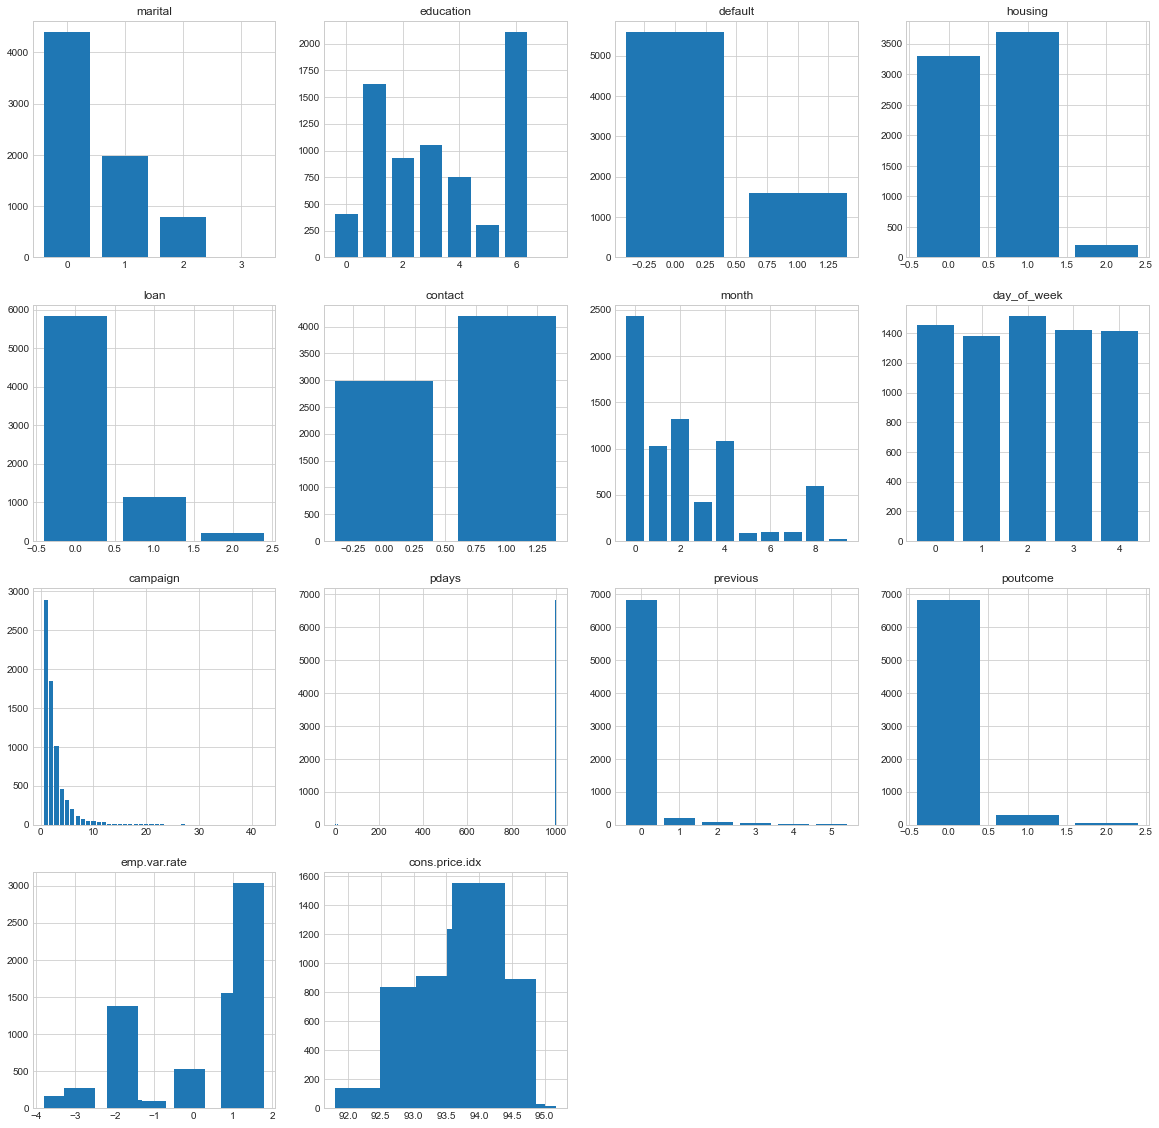

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
X_discrete = X.iloc[:, :14]
plt.figure(figsize=(20, 20))
for i in range(14):
    temp_series = X_discrete.iloc[:, i]
    vc = temp_series.value_counts()
    plt.subplot(4, 4, i+1)
    plt.bar(vc.index, vc.values)
    plt.title(discrete_features.index[i])

In [5]:
X = X.drop(['day_of_week'], axis=1)
X.head()

,marital,education,default,housing,loan,contact,month,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,,,,,,,,,,,,,,,,
34,0,0,0,0,0,0,0,4.0,999,0,0,1.1,93.994,-36.4,4.857,5191.0
29,0,1,0,1,0,0,1,3.0,999,0,0,1.4,94.465,-41.8,4.959,5228.1
38,0,1,1,0,0,0,0,4.0,999,0,0,1.1,93.994,-36.4,4.860,5191.0
31,0,1,1,0,0,0,1,2.0,999,0,0,1.4,94.465,-41.8,4.866,5228.1
45,0,2,0,1,0,0,0,NaN,6,2,1,-1.8,93.876,-40.0,0.683,5008.7


In [7]:
X.to_csv('unnormalized_test.csv', index=False)